In [1]:
import numpy as np
import pandas as pd


from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.models import Model
from keras.layers import LSTM

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from math import sqrt

Using TensorFlow backend.
c:\users\dorotka\anaconda3\envs\dataanalitics\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\dorotka\anaconda3\envs\dataanalitics\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\dorotka\anaconda3\envs\dataanalitics\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\dorotka\

In [2]:
import matplotlib.pyplot as plt

def show_y_pred_test(y_pred_df, y_test_df, n=3,size = 100, station_name = ""):
    plt.figure()
    plt.plot(y_pred_df['PM10_Forecast_{}h'.format(n)][:size])
    plt.plot(y_test_df.reset_index()['PM10_Forecast_{}h'.format(n)][:size] )
    plt.title("Forecast {}h {}".format(n, station_name))
    plt.ylabel('PM10')
    plt.xlabel('index')
    plt.legend(['y_predicted', 'y_original'], loc='upper left')
    return plt

# Dane

In [3]:
data = pd.read_csv("./data_preprocessed/2017-2018_single_MpKrakAlKras_with_forecast3_8_12h_cleared.csv")

data.head(5)

,timestamp,MpKrakAlKras-PM10-1g,Weather,Temp(C),Wind(m/s),Direction(deg),Humidity,Barometer(mbar),PM10_Forecast_3h,PM10_Forecast_8h,PM10_Forecast_12h
0,2017-01-01 01:00:00,213.733,Ice fog.,-6.0,1.0,0.0,0.93,10.24,244.690,187.320,121.805
1,2017-01-01 02:00:00,213.868,Ice fog.,-7.0,2.0,190.0,0.93,10.24,224.673,181.194,119.096
2,2017-01-01 03:00:00,221.923,Ice fog.,-4.0,3.0,200.0,0.80,10.23,212.159,161.198,121.681
3,2017-01-01 04:00:00,244.690,Ice fog.,-7.0,3.0,210.0,0.86,10.22,198.375,136.218,138.353
4,2017-01-01 05:00:00,224.673,Ice fog.,-6.0,3.0,200.0,0.80,10.22,191.881,121.805,150.415


In [4]:
X = data[["MpKrakAlKras-PM10-1g","Direction(deg)","Temp(C)","Wind(m/s)","Humidity","Barometer(mbar)"]]

y = data[["PM10_Forecast_3h","PM10_Forecast_8h","PM10_Forecast_12h"]]

In [5]:
scaler = StandardScaler()
X_scale = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_scale.head()

,MpKrakAlKras-PM10-1g,Direction(deg),Temp(C),Wind(m/s),Humidity,Barometer(mbar)
0,3.406057,-1.229537,-1.641839,-1.06963,0.922469,1.009585
1,3.408971,0.461359,-1.747499,-0.62705,0.922469,1.009585
2,3.582857,0.550354,-1.430521,-0.18447,0.165148,0.881591
3,4.074335,0.639348,-1.747499,-0.18447,0.514681,0.753597
4,3.642222,0.550354,-1.641839,-0.18447,0.165148,0.753597


# PCA

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

X_pca = pca.fit_transform(X_scale)

In [7]:
#weather_id trzeba by dodać jako one-hot a nie słownik, tylko że wtedy mamy 100 dodatkowych kolumn

train_X, test_X, train_y, test_y = train_test_split(X_pca, y, test_size=0.1,
                                                    random_state=0)

In [8]:
# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Model

In [9]:
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold

def create_model():
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=5, activation='sigmoid'))
    model.add(Dense(8, activation='sigmoid'))
    model.add(Dense(3, activation='linear'))

    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam' , metrics=['mse', 'mae'])
    return model

# evaluate model
# estimator_kras = KerasRegressor(build_fn=create_model, epochs=50, batch_size=20, verbose=0)

In [10]:
model_kras = create_model()
history = model_kras.fit(train_X, train_y, epochs=50, batch_size=20, verbose = 1)


Epoch 1/50
15572/15572 [==============================] - 2s 110us/step - loss: 4847.5800 - mse: 4847.5781 - mae: 52.2741
Epoch 2/50
15572/15572 [==============================] - 2s 102us/step - loss: 4150.4766 - mse: 4150.4746 - mae: 45.2251
Epoch 3/50
15572/15572 [==============================] - 1s 92us/step - loss: 3553.3895 - mse: 3553.3923 - mae: 38.8022
Epoch 4/50
15572/15572 [==============================] - 1s 93us/step - loss: 3125.5138 - mse: 3125.5137 - mae: 34.4518
Epoch 5/50
15572/15572 [==============================] - 1s 83us/step - loss: 2801.4632 - mse: 2801.4622 - mae: 31.5477
Epoch 6/50
15572/15572 [==============================] - 1s 84us/step - loss: 2553.8412 - mse: 2553.8420 - mae: 29.7170
Epoch 7/50
15572/15572 [==============================] - 1s 83us/step - loss: 2345.4519 - mse: 2345.4512 - mae: 28.0595
Epoch 8/50
15572/15572 [==============================] - 1s 86us/step - loss: 2165.4275 - mse: 2165.4270 - mae: 26.7172
Epoch 9/50
15572/15572 [=====

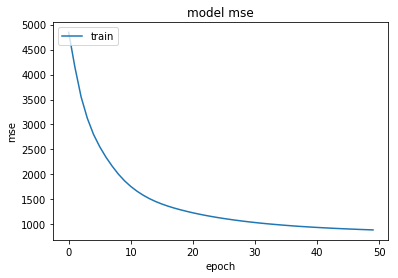

In [11]:
hist_k = 'mse'
plt.plot(history.history[hist_k])
plt.title("model {}".format(hist_k))
plt.ylabel(hist_k)
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
y_pred = model_kras.predict(test_X)
rms = sqrt(mean_squared_error(test_y, y_pred))
rms

30.904994173264427

In [13]:
now = np.array([[20,210,-8,3,0.8 ,10]])
n=scaler.transform(now)
n = pca.transform(n)

pred = model_kras.predict(n)
pred
#def predict(condtions):
#    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=96)
#    score = model.predict([x_test])[0]

array([[50.898323, 50.96653 , 50.8656  ]], dtype=float32)

### Podsumowanie

In [14]:
_, X_test_orig, _, y_test_orig = train_test_split(X, y, test_size=0.1,
                                                    random_state=0)

y_test_orig = y_test_orig.sort_index()
X_test_orig = X_test_orig.sort_index()

X_test_scaler = pd.DataFrame(scaler.transform(X_test_orig),columns=X_test_orig.columns)
X_test_pca = pca.transform(X_test_scaler)

y_pred = model_kras.predict(X_test_pca)
y_pred_df = pd.DataFrame(y_pred,columns=y_test_orig.columns)
y_pred_df.head()

,PM10_Forecast_3h,PM10_Forecast_8h,PM10_Forecast_12h
0,168.691010,154.940857,150.549744
1,118.747551,111.632027,108.984879
2,132.281784,123.300652,120.164139
3,169.165237,155.358063,150.953003
4,74.636414,72.744370,71.723282


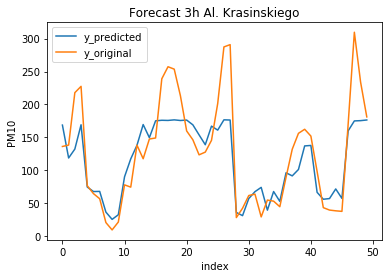

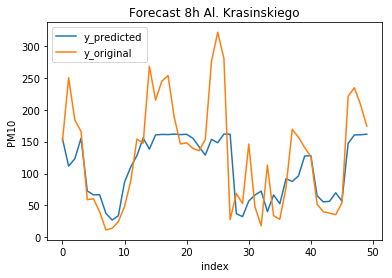

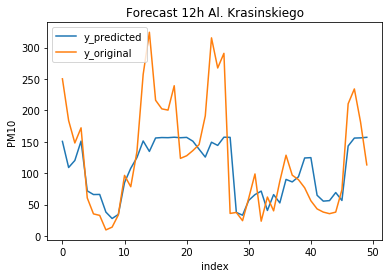

In [15]:
for n in (3, 8, 12):
    show_y_pred_test(y_pred_df, y_test_orig, n=n, size=50, station_name="Al. Krasinskiego")

# To samo dla ul Bujaka

In [16]:
data = pd.read_csv("./data_preprocessed/2017-2018_single_MpKrakBujaka_with_forecast3_8_12h_cleared.csv")

data.head(5)

,timestamp,MpKrakBujaka-PM10-1g,Weather,Temp(C),Wind(m/s),Direction(deg),Humidity,Barometer(mbar),PM10_Forecast_3h,PM10_Forecast_8h,PM10_Forecast_12h
0,2017-01-01 01:00:00,392.428,Ice fog.,-6.0,1.0,0.0,0.93,10.24,191.820,153.0490,81.3565
1,2017-01-01 02:00:00,258.667,Ice fog.,-7.0,2.0,190.0,0.93,10.24,187.663,127.6300,68.4491
2,2017-01-01 03:00:00,211.760,Ice fog.,-4.0,3.0,200.0,0.80,10.23,183.347,119.8900,83.1521
3,2017-01-01 04:00:00,191.820,Ice fog.,-7.0,3.0,210.0,0.86,10.22,153.062,108.1610,114.0370
4,2017-01-01 05:00:00,187.663,Ice fog.,-6.0,3.0,200.0,0.80,10.22,148.309,81.3565,154.2260


In [17]:
X = data[["MpKrakBujaka-PM10-1g","Direction(deg)","Temp(C)","Wind(m/s)","Humidity","Barometer(mbar)"]]

y = data[["PM10_Forecast_3h","PM10_Forecast_8h","PM10_Forecast_12h"]]

In [18]:
scaler = StandardScaler()
X_scale = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_scale.head()

,MpKrakBujaka-PM10-1g,Direction(deg),Temp(C),Wind(m/s),Humidity,Barometer(mbar)
0,7.769326,-1.225402,-1.614220,-1.089081,0.939750,1.009646
1,4.791464,0.468566,-1.718042,-0.640536,0.939750,1.009646
2,3.747194,0.557722,-1.406576,-0.191990,0.184622,0.881477
3,3.303279,0.646878,-1.718042,-0.191990,0.533143,0.753308
4,3.210733,0.557722,-1.614220,-0.191990,0.184622,0.753308


In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

X_pca = pca.fit_transform(X_scale)
pd.DataFrame(data=X_pca).head()

,0,1,2,3,4
0,6.096014,0.017752,-1.500081,4.665515,-0.524698
1,3.912358,1.169335,-1.318329,2.741607,-1.106312
2,2.682536,1.011898,-1.421598,2.436180,-0.717153
3,2.700099,1.355238,-1.107641,2.028863,-0.698466
4,2.484875,1.124829,-1.212678,2.121761,-0.584925


In [20]:
train_X, test_X, train_y, test_y = train_test_split(X_pca, y, test_size=0.1,
                                                    random_state=0)

In [21]:
model_bujaka = create_model()
history = model_bujaka.fit(train_X, train_y, epochs=50, batch_size=20, verbose = 1)

Epoch 1/50
14893/14893 [==============================] - 2s 106us/step - loss: 3519.2916 - mse: 3519.2920 - mae: 39.2535
Epoch 2/50
14893/14893 [==============================] - 1s 83us/step - loss: 3049.4932 - mse: 3049.4915 - mae: 33.0935
Epoch 3/50
14893/14893 [==============================] - 1s 93us/step - loss: 2677.0811 - mse: 2677.0786 - mae: 28.3611
Epoch 4/50
14893/14893 [==============================] - 1s 90us/step - loss: 2423.6661 - mse: 2423.6663 - mae: 25.9195
Epoch 5/50
14893/14893 [==============================] - 1s 86us/step - loss: 2240.8369 - mse: 2240.8364 - mae: 24.7189
Epoch 6/50
14893/14893 [==============================] - 1s 91us/step - loss: 2090.0715 - mse: 2090.0713 - mae: 23.6150
Epoch 7/50
14893/14893 [==============================] - 1s 90us/step - loss: 1956.9180 - mse: 1956.9186 - mae: 22.6177
Epoch 8/50
14893/14893 [==============================] - 1s 94us/step - loss: 1832.6247 - mse: 1832.6249 - mae: 21.6518
Epoch 9/50
14893/14893 [=======

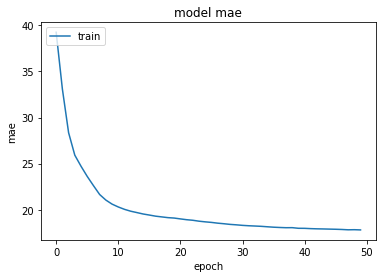

In [22]:
hist_k = 'mae'
plt.plot(history.history[hist_k])
plt.title("model {}".format(hist_k))
plt.ylabel(hist_k)
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
y_pred = model_bujaka.predict(test_X)
rms = sqrt(mean_squared_error(test_y, y_pred))
rms

30.87187713732838

### Podsumowanie:

In [25]:
_, X_test_orig, _, y_test_orig = train_test_split(X, y, test_size=0.1,
                                                    random_state=0)

y_test_orig = y_test_orig.sort_index()
X_test_orig = X_test_orig.sort_index()

X_test_scaler = pd.DataFrame(scaler.transform(X_test_orig),columns=X_test_orig.columns)
X_test_pca = pca.transform(X_test_scaler)

y_pred = model_bujaka.predict(X_test_pca)
y_pred_df = pd.DataFrame(y_pred,columns=y_test_orig.columns)
y_pred_df.head()

,PM10_Forecast_3h,PM10_Forecast_8h,PM10_Forecast_12h
0,142.440475,129.665863,123.915710
1,113.755875,104.758415,101.219650
2,143.349152,130.452484,124.655289
3,156.225266,141.640869,134.848633
4,103.335884,95.715050,92.930077


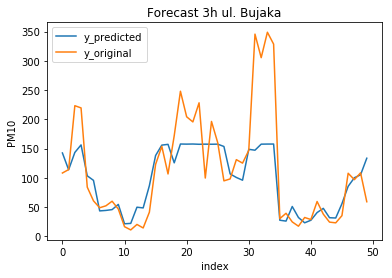

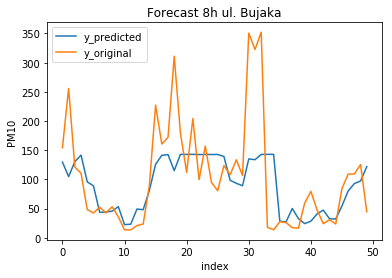

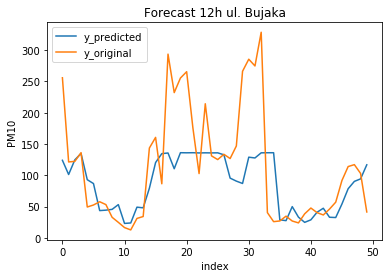

In [26]:
for n in (3, 8, 12):
    show_y_pred_test(y_pred_df, y_test_orig, n=n, size=50, station_name="ul. Bujaka")